In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# loading dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df["Diabetic?"] = "No"
df.loc[df["Outcome"] == 1, "Diabetic?"] = "Yes"

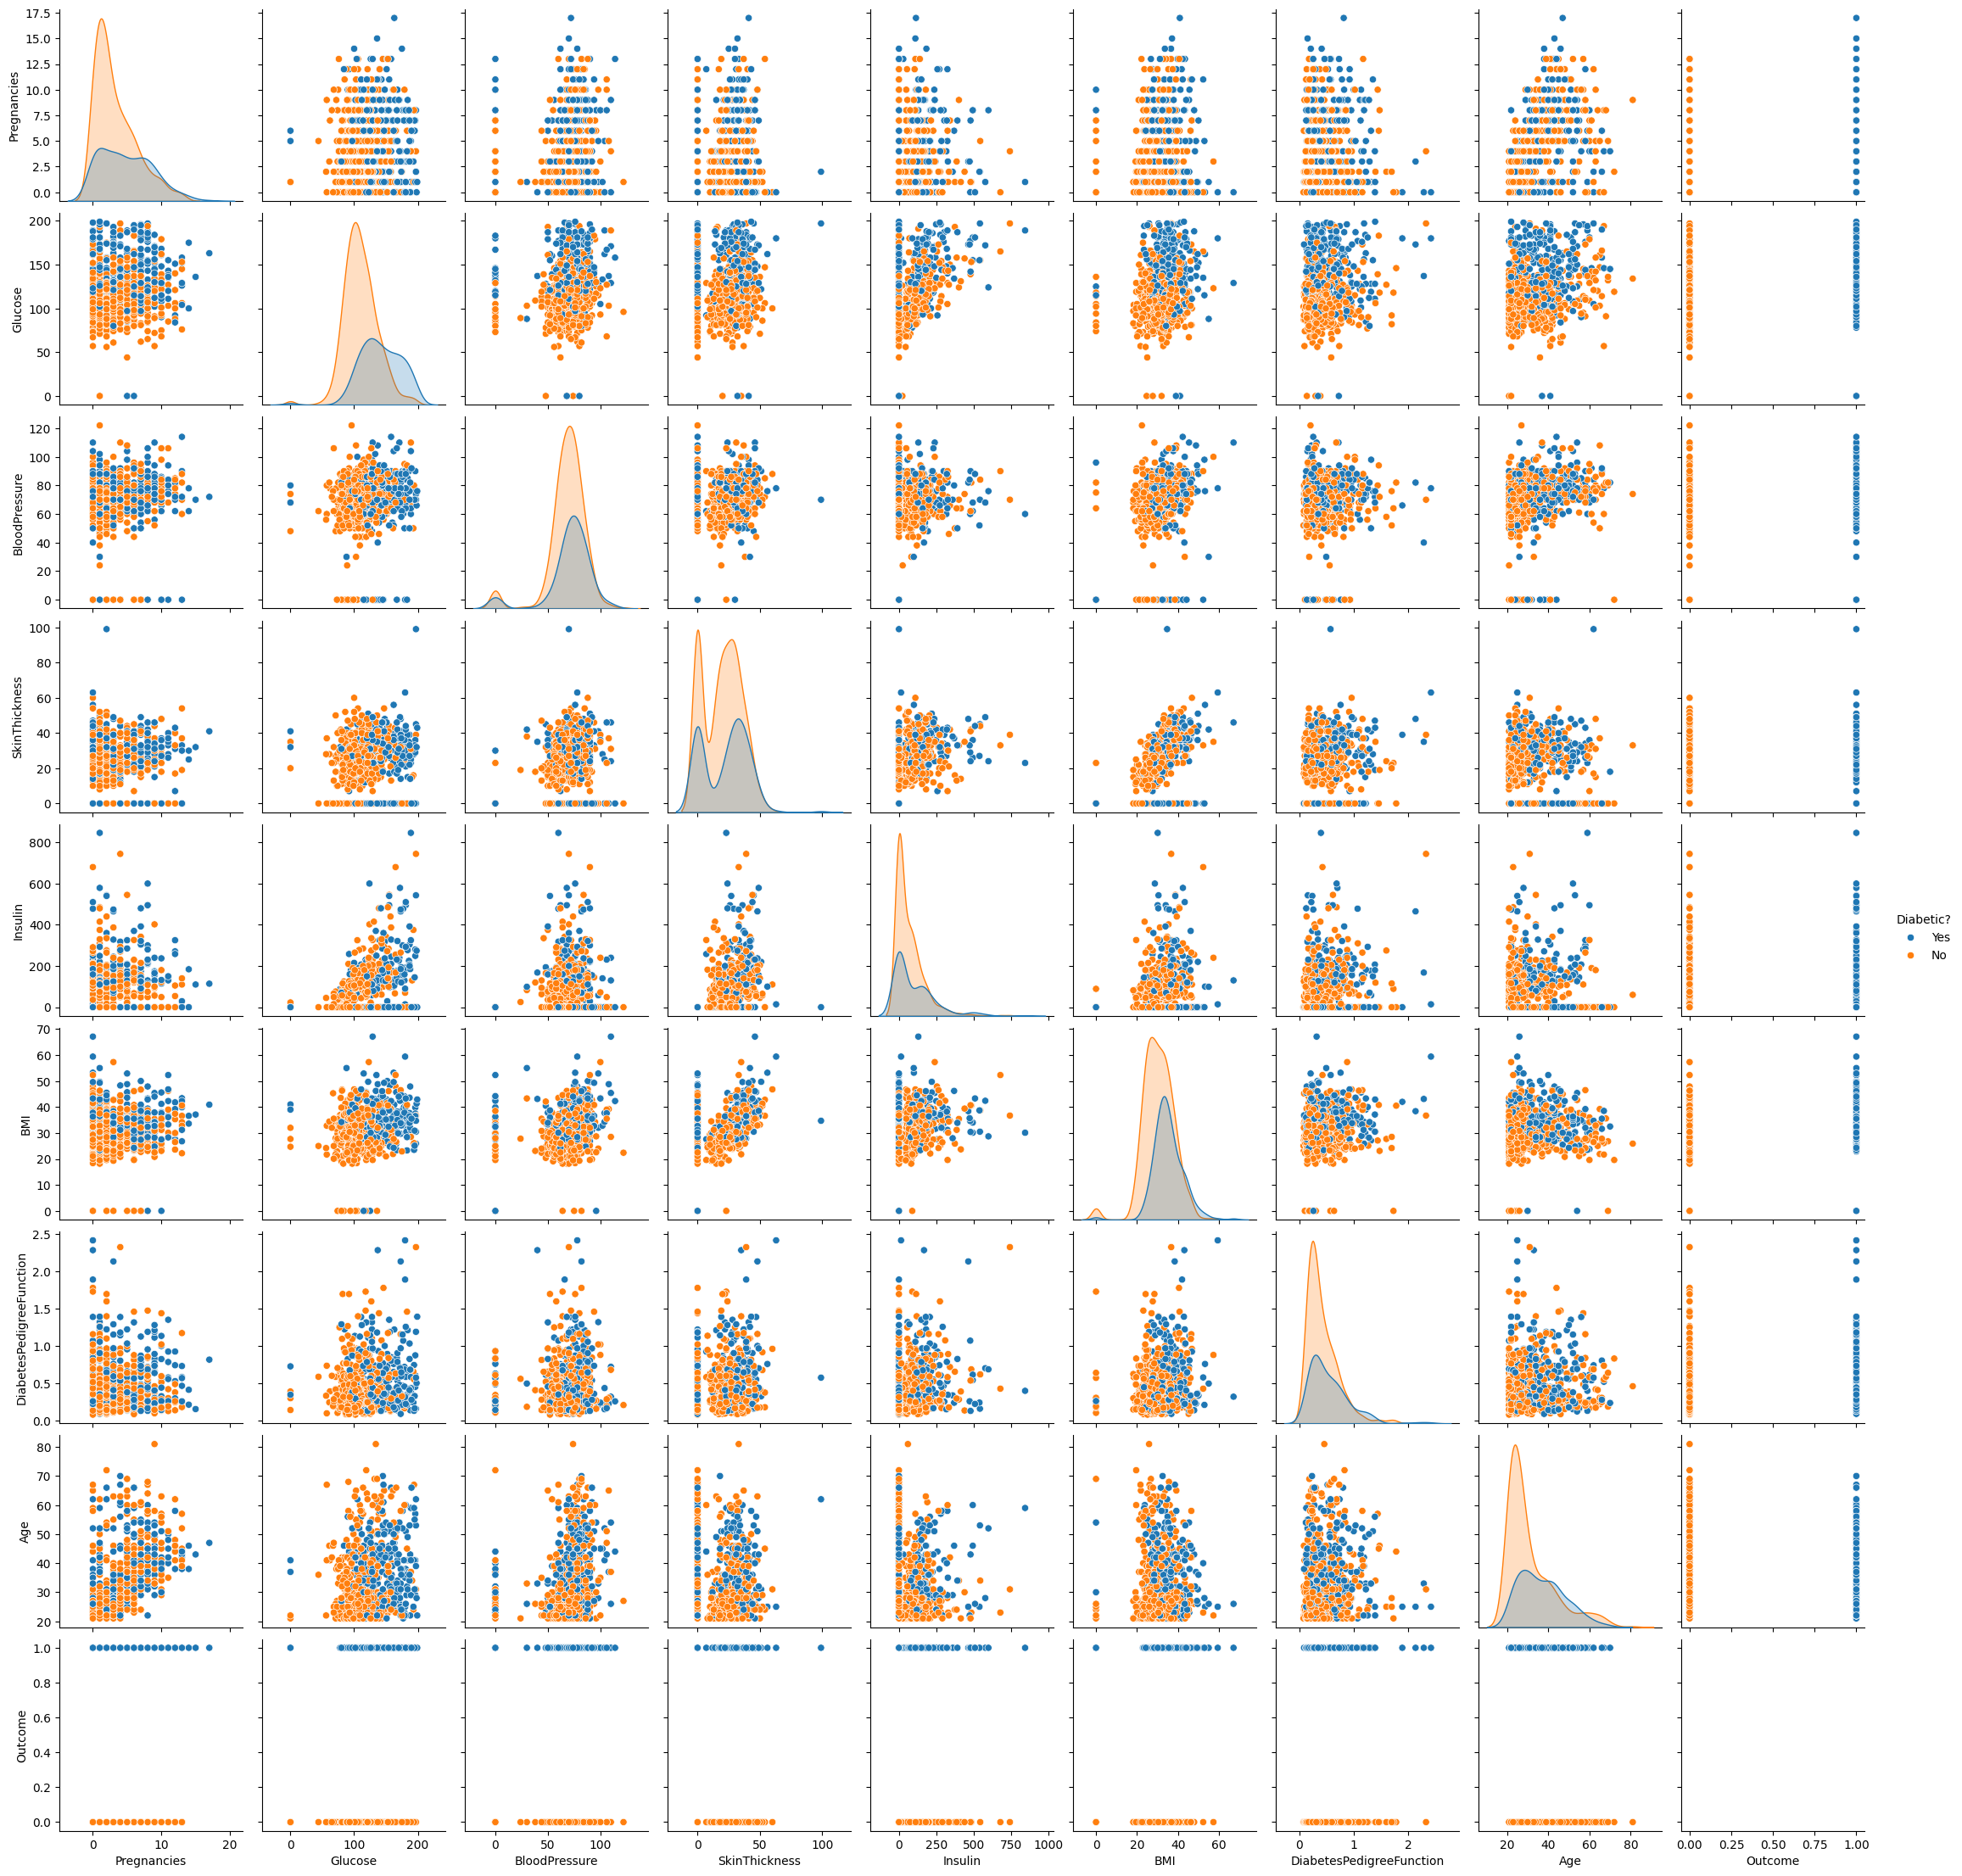

In [5]:
sns.pairplot(df, hue = "Diabetic?")

In [6]:
X = df.drop(["Outcome", "Diabetic?"], axis = 1).values
y = df["Outcome"].values

In [7]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# compulsory

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
# defining the ANN model

class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1 = 25, hidden2 = 20, out_features = 2):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return X

In [10]:
# initialising ANN

torch.manual_seed(20)
model = ANN_Model()

In [11]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=8, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
# initialising loss function and optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [13]:
# training the ANN

epochs = 750
final_losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())
    if i % 10 == 1:
        print("Epoch: {}, Loss = {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1, Loss = 1.0583827495574951
Epoch: 11, Loss = 0.6603350043296814
Epoch: 21, Loss = 0.6245314478874207
Epoch: 31, Loss = 0.6053271293640137
Epoch: 41, Loss = 0.5895699858665466
Epoch: 51, Loss = 0.5773084759712219
Epoch: 61, Loss = 0.5635374188423157
Epoch: 71, Loss = 0.5501046180725098
Epoch: 81, Loss = 0.5379405617713928
Epoch: 91, Loss = 0.5276158452033997
Epoch: 101, Loss = 0.5194411277770996
Epoch: 111, Loss = 0.5121551752090454
Epoch: 121, Loss = 0.5055835247039795
Epoch: 131, Loss = 0.5011945366859436
Epoch: 141, Loss = 0.49491673707962036
Epoch: 151, Loss = 0.48855894804000854
Epoch: 161, Loss = 0.4928530752658844
Epoch: 171, Loss = 0.48068997263908386
Epoch: 181, Loss = 0.4725192189216614
Epoch: 191, Loss = 0.46671590209007263
Epoch: 201, Loss = 0.46183738112449646
Epoch: 211, Loss = 0.45918965339660645
Epoch: 221, Loss = 0.45663630962371826
Epoch: 231, Loss = 0.44970980286598206
Epoch: 241, Loss = 0.4424859881401062
Epoch: 251, Loss = 0.44315147399902344
Epoch: 261, Lo

Text(0, 0.5, 'Loss')

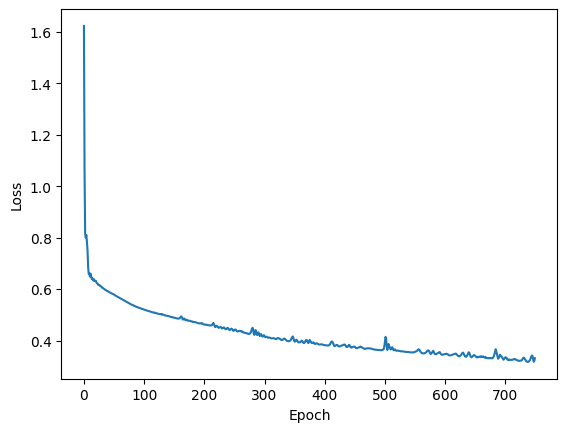

In [14]:
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [15]:
# predicting the test examples

predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        pred = model(data)
        # print(pred.argmax().item())
        predictions.append(pred.argmax().item())

print(predictions)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [16]:
report = classification_report(y_test, predictions, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.8319    0.9252    0.8761       107
           1     0.7714    0.5745    0.6585        47

    accuracy                         0.8182       154
   macro avg     0.8017    0.7499    0.7673       154
weighted avg     0.8135    0.8182    0.8097       154



In [17]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[99  8]
 [20 27]]


In [18]:
# predicting the training examples

predictions_train = []
with torch.no_grad():
    for i, data in enumerate(X_train):
        pred = model(data)
        # print(pred.argmax().item())
        predictions_train.append(pred.argmax().item())

print(predictions_train)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [19]:
report_train = classification_report(y_train, predictions_train, digits = 4)
print(report_train)

              precision    recall  f1-score   support

           0     0.8202    0.9517    0.8810       393
           1     0.8797    0.6290    0.7335       221

    accuracy                         0.8355       614
   macro avg     0.8500    0.7903    0.8073       614
weighted avg     0.8416    0.8355    0.8279       614



In [20]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[374  19]
 [ 82 139]]


Text(95.72222222222221, 0.5, 'Predicted Value')

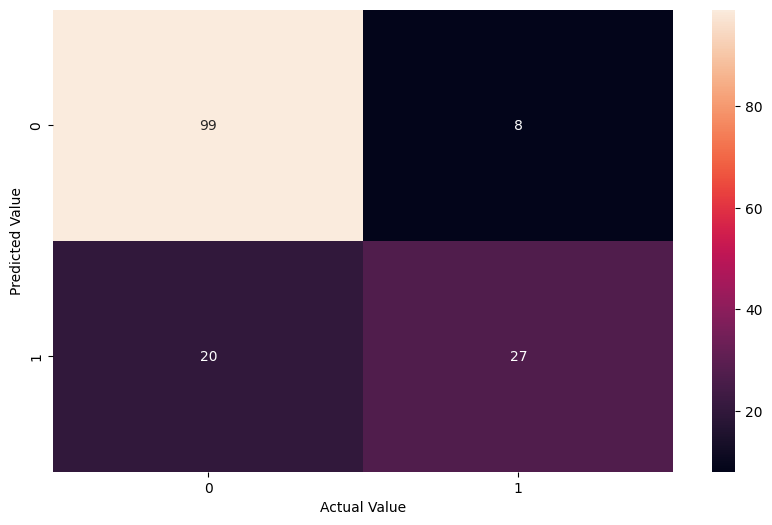

In [21]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [22]:
# saving the model

torch.save(model, 'diabetes.pt')

In [23]:
# load the model

model = torch.load('diabetes.pt')

In [24]:
# predicting for new data points

new_data = [3, 109, 72, 35, 0, 33.6, 0.627, 39]
new_data = torch.FloatTensor(new_data)

with torch.no_grad():
    new_pred = model(new_data)
    print(new_pred)
    print(new_pred.argmax().item())

tensor([3.2924, 1.7930])
0
